In [19]:
import os
import re

def count_files_with_techniques_and_subtechniques(folder_path):
    # Counters for files with only techniques and with both techniques and sub-techniques
    only_techniques_count = 0
    techniques_and_subtechniques_count = 0

    # Regex to extract TTP IDs (ignores extra metadata)
    ttp_pattern = re.compile(r'\bT\d{4}(\.\d+)?\b')

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        # Flags to check if the file has techniques and/or sub-techniques
        has_technique = False
        has_subtechnique = False

        # Open the file and check each line for TTP patterns
        with open(file_path, 'r') as file:
            for line in file:
                match = ttp_pattern.search(line)
                if match:
                    ttp_id = match.group(0)  # Extracts the TTP ID (e.g., "T1027" or "T1003.004")
                    if "." in ttp_id:
                        has_subtechnique = True  # Detected a sub-technique
                    else:
                        has_technique = True     # Detected a technique

        # Update the counters based on what was found in the file
        if has_technique and not has_subtechnique:
            only_techniques_count += 1
        elif has_technique and has_subtechnique:
            techniques_and_subtechniques_count += 1

    return only_techniques_count, techniques_and_subtechniques_count


In [20]:
folder_path = 'malpedia_20220718/iocs'
#folder_path = 'downloads/20241008_downloads/iocs2'
only_techniques, both_techniques_and_subtechniques = count_files_with_techniques_and_subtechniques(folder_path)
print(f"Files with only techniques: {only_techniques}")
print(f"Files with both techniques and sub-techniques: {both_techniques_and_subtechniques}")

Files with only techniques: 472
Files with both techniques and sub-techniques: 523


In [37]:
import os
import re

def count_cumulative_unique_ttps(folder_path):
    # Set to store cumulative unique TTP IDs across all files
    cumulative_unique_ttps = set()

    # Regex to capture full TTP IDs (anything starting with 'T' followed by numbers, possibly with dot and more numbers)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        # Open the file and check each line for TTP patterns
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTP IDs in the line and add them directly to the cumulative set
                matches = ttp_pattern.findall(line)
                cumulative_unique_ttps.update(matches)  # Add each unique TTP ID found in the line

    # Count of unique TTPs across all files
    num_cumulative_unique_ttps = len(cumulative_unique_ttps)

    return num_cumulative_unique_ttps, list(cumulative_unique_ttps)


In [5]:
folder_path = 'malpedia_20220718/iocs'
#folder_path = 'downloads/20241008_downloads/iocs2'
num_techniques, list_of_techniques = count_cumulative_unique_ttps(folder_path)
print(f"Unique techniques: {num_techniques}")

# To store the list in the file
#output_file = 'MITRETTPlist.txt'

# Write each element of the list to the file, one per line
#with open(output_file, 'w') as file:
#    for element in list_of_techniques:
#        file.write(f"{element}\n")

#print(f"Unique sub-techniques: {num_subtechniques}")

NameError: name 'count_cumulative_unique_ttps' is not defined

In [7]:
import os
import re

def collect_unique_ttps(folder_path):
    # Regex pattern to capture TTPs (e.g., T1003, T1018, T1037)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Dictionary to store the count of unique TTPs per file
    ttp_counts = {}

    # Loop through files in the specified folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Skip if not a file
        if not os.path.isfile(file_path):
            continue

        # Set to store unique TTPs in the current file
        unique_ttps = set()

        # Read the file and extract TTPs
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTPs in the line and add them to the set
                matches = ttp_pattern.findall(line)
                unique_ttps.update(matches)
        
        # Store the count of unique TTPs in the dictionary with the filename
        ttp_counts[filename] = len(unique_ttps)
    
    return ttp_counts


In [10]:
# Call the function and print the results
ttp_counts = collect_unique_ttps(folder_path)
#print("Unique TTP counts per file:")
#print(ttp_counts)

# Filter the ttp_counts dictionary to get files with only 1 unique TTP
files_with_one_ttp = {filename: count for filename, count in ttp_counts.items() if count == 1}

#print("Files with exactly 1 unique TTP:")
print(len(files_with_one_ttp))


116


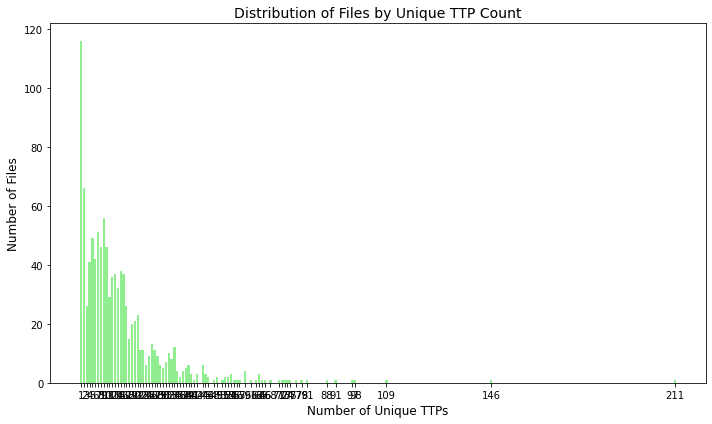

In [65]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter

def analyze_ttps(folder_path):
    # Regex to capture full TTP IDs (anything starting with 'T' followed by numbers, possibly with dot and more numbers)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Set to store cumulative unique TTP IDs across all files
    cumulative_unique_ttps = set()
    
    # Lists to store the count of TTPs and file paths
    file_ttp_counts = []
    file_paths = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        # Set to store unique TTP IDs in the current file
        unique_ttps_in_file = set()

        # Open the file and check each line for TTP patterns
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTP IDs in the line and add them to the file's set
                matches = ttp_pattern.findall(line)
                unique_ttps_in_file.update(matches)

        # Add the unique TTPs from the current file to the cumulative set
        cumulative_unique_ttps.update(unique_ttps_in_file)

        # Store the count of TTPs in the current file and its path
        file_ttp_counts.append(len(unique_ttps_in_file))
        file_paths.append(file_path)

    # Calculate the statistics
    num_cumulative_unique_ttps = len(cumulative_unique_ttps)
    total_ttps = sum(file_ttp_counts)
    num_files = len(file_ttp_counts)
    average_ttps = total_ttps / num_files if num_files > 0 else 0
    min_ttps = min(file_ttp_counts) if file_ttp_counts else 0
    max_ttps = max(file_ttp_counts) if file_ttp_counts else 0

    # Get file paths for min and max TTPs
    min_ttp_file = file_paths[file_ttp_counts.index(min_ttps)] if file_ttp_counts else None
    max_ttp_file = file_paths[file_ttp_counts.index(max_ttps)] if file_ttp_counts else None

    return {
        "cumulative_unique_ttps": num_cumulative_unique_ttps,
        "average_ttps": average_ttps,
        "min_ttps": min_ttps,
        "max_ttps": max_ttps,
        "min_ttp_file": min_ttp_file,
        "max_ttp_file": max_ttp_file,
        "file_ttp_counts": file_ttp_counts,
        "file_paths": file_paths  # Pass file paths for labeling the bar chart
    }

def plot_file_count_by_ttp_buckets(file_ttp_counts):
    # Count the frequency of TTP counts
    ttp_count_distribution = Counter(file_ttp_counts)

    # Prepare data for the bar chart
    x_values = sorted(ttp_count_distribution.keys())  # Unique TTP counts (sorted)
    y_values = [ttp_count_distribution[ttp] for ttp in x_values]  # Frequency of each TTP count

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='lightgreen')
    plt.xlabel('Number of Unique TTPs', fontsize=12)
    plt.ylabel('Number of Files', fontsize=12)
    plt.title('Distribution of Files by Unique TTP Count', fontsize=14)
    plt.xticks(x_values, fontsize=10)  # Show exact TTP counts on the x-axis
    plt.tight_layout()  # Adjust layout
    plt.show()

results = analyze_ttps(folder_path)

# Display the TTP bucket distribution chart
plot_file_count_by_ttp_buckets(results["file_ttp_counts"])


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 59, 61, 63, 64, 65, 66, 68, 71, 72, 73, 74, 75, 77, 79, 81, 88, 91, 97, 98, 109, 146, 211]


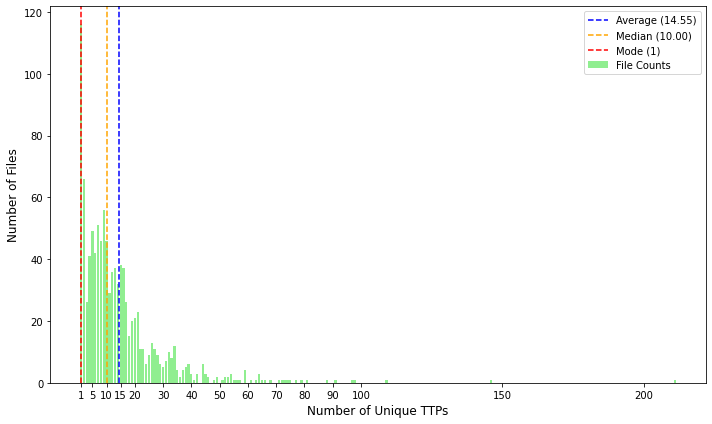

In [19]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import statistics

def analyze_ttps(folder_path):
    # Regex to capture full TTP IDs (anything starting with 'T' followed by numbers, possibly with dot and more numbers)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Set to store cumulative unique TTP IDs across all files
    cumulative_unique_ttps = set()
    
    # Lists to store the count of TTPs and file paths
    file_ttp_counts = []
    file_paths = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Skip if it's not a file
        if not os.path.isfile(file_path):
            continue

        # Set to store unique TTP IDs in the current file
        unique_ttps_in_file = set()

        # Open the file and check each line for TTP patterns
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTP IDs in the line and add them to the file's set
                matches = ttp_pattern.findall(line)
                unique_ttps_in_file.update(matches)

        # Add the unique TTPs from the current file to the cumulative set
        cumulative_unique_ttps.update(unique_ttps_in_file)

        # Store the count of TTPs in the current file and its path
        file_ttp_counts.append(len(unique_ttps_in_file))
        file_paths.append(file_path)

    # Calculate the statistics
    num_cumulative_unique_ttps = len(cumulative_unique_ttps)
    average_ttps = statistics.mean(file_ttp_counts) if file_ttp_counts else 0
    median_ttps = statistics.median(file_ttp_counts) if file_ttp_counts else 0
    mode_ttps = statistics.mode(file_ttp_counts) if file_ttp_counts else None

    return {
        "cumulative_unique_ttps": num_cumulative_unique_ttps,
        "average_ttps": average_ttps,
        "median_ttps": median_ttps,
        "mode_ttps": mode_ttps,
        "file_ttp_counts": file_ttp_counts,
        "file_paths": file_paths  # Pass file paths for labeling the bar chart
    }

def plot_file_count_by_ttp_buckets(file_ttp_counts, average, median, mode):
    # Count the frequency of TTP counts
    ttp_count_distribution = Counter(file_ttp_counts)

    # Prepare data for the bar chart
    x_values = sorted(ttp_count_distribution.keys())  # Unique TTP counts (sorted)
    print(x_values)
    y_values = [ttp_count_distribution[ttp] for ttp in x_values]  # Frequency of each TTP count

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='lightgreen', label='File Counts')

    # Highlight average, median, and mode
    plt.axvline(x=average, color='blue', linestyle='--', linewidth=1.5, label=f'Average ({average:.2f})')
    plt.axvline(x=median, color='orange', linestyle='--', linewidth=1.5, label=f'Median ({median:.2f})')
    plt.axvline(x=mode, color='red', linestyle='--', linewidth=1.5, label=f'Mode ({mode})')

    # Add labels and title
    plt.xlabel('Number of Unique TTPs', fontsize=12)
    plt.ylabel('Number of Files', fontsize=12)
    #plt.title('Distribution of Files by Unique TTP Count', fontsize=14)
    #plt.xticks(x_values, fontsize=10)  # Show exact TTP counts on the x-axis

    #Customize x-axis ticks for MITRE
    #plt.xticks([1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['1', '5', '10', '15', '20', '30', '40', '50', '60', '70', '80', '90', '100'], fontsize=10)
    
    
    #Customize x-axis ticks for Malpedia
    plt.xticks([1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200], labels=['1', '5', '10', '15', '20', '30', '40', '50', '60', '70', '80', '90','100', '150', '200'], fontsize=10)
    plt.legend()
    plt.tight_layout()  # Adjust layout
    
    # Save the plot as a PDF
    output_pdf = "Malpediacount_plot.pdf"
    #output_pdf = "MITREcount_plot.pdf"
    plt.savefig(output_pdf, format='pdf')
    
    plt.show()


results = analyze_ttps(folder_path)

# Display the TTP bucket distribution chart
plot_file_count_by_ttp_buckets(
    results["file_ttp_counts"], 
    results["average_ttps"], 
    results["median_ttps"], 
    results["mode_ttps"]
)


In [20]:
import json
from urllib.parse import urlparse

def extract_fqdn_and_date(file_path: str):
    """
    Extracts the FQDN from the 'url' field, the 'date', and the 'download_sha256' field from the provided JSON lines.

    Args:
        file_path (str): Path to the file containing JSON entries.

    Returns:
        list: A list of tuples containing the FQDN, date, and download_sha256 for each entry.
    """
    results = []

    with open(file_path, 'r') as file:
        # Read each line of the JSONL file
        for line in file:
            entry = json.loads(line)
            
            # Extract the FQDN from the 'url'
            url = entry.get("url", "")
            parsed_url = urlparse(url)
            fqdn = parsed_url.netloc  # Get the FQDN part from the URL

            # Extract the 'date'
            date = entry.get("date", "")

            # Extract the 'download_sha256'
            download_sha256 = entry.get("download_sha256", "")

            # Append the FQDN, date, and download_sha256 to the results
            results.append((fqdn, date, download_sha256))

    return results


In [21]:
# Example usage
file_path = r"/Users/aakankshahome/Library/Mobile Documents/com~apple~CloudDocs/malpedia_20220718/malpedia-db_2022-07-18_downloader.jsonl"
#malpedia_fqdn_and_dates = extract_fqdn_and_date(file_path)

# To view the results (FQDN, date, download_sha256)
#for fqdn, date, download_sha256 in malpedia_fqdn_and_dates:


In [22]:
import os
import re
import json
from urllib.parse import urlparse

def collect_ttp_counts_with_metadata(folder_path, metadata_file_path):
    # Regex pattern to capture TTPs (e.g., T1003, T1018, T1037)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Dictionary to store the results
    combined_data = {}

    # Load all metadata from the JSONL file into a dictionary
    metadata = {}
    with open(metadata_file_path, 'r') as meta_file:
        for line in meta_file:
            entry = json.loads(line)
            download_sha256 = entry.get("download_sha256")
            if download_sha256:
                metadata[download_sha256] = {
                    "fqdn": urlparse(entry.get("url", "")).netloc,
                    "date": entry.get("date", "")
                }

    # Loop through files in the specified folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Skip if not a file
        if not os.path.isfile(file_path):
            continue

        # Extract the hash from the filename (up to the first '.')
        download_sha256 = filename.split(".")[0]

        # Set to store unique TTPs in the current file
        unique_ttps = set()

        # Read the file and extract TTPs
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTPs in the line and add them to the set
                matches = ttp_pattern.findall(line)
                unique_ttps.update(matches)


        # Count the number of unique TTPs
        ttp_count = len(unique_ttps)

        # Get metadata for the current file's hash
        file_metadata = metadata.get(download_sha256, {})
        fqdn = file_metadata.get("fqdn")
        date = file_metadata.get("date")

        # Add the data to the dictionary
        combined_data[filename] = {
            "unique_ttp_count": ttp_count,
            "date": date,
            "fqdn": fqdn,
            "download_sha256": download_sha256,
        }

    return combined_data

# Specify the folder path containing the files and the metadata file path
folder_path = 'malpedia_20220718/iocs'
metadata_file_path = r"/Users/aakankshahome/Library/Mobile Documents/com~apple~CloudDocs/malpedia_20220718/malpedia-db_2022-07-18_downloader.jsonl"

# Collect the data
results = collect_ttp_counts_with_metadata(folder_path, metadata_file_path)


#print(json.dumps(results, indent=4))

# Print the count of the results
print(f"Total files processed: {len(results)}")

Total files processed: 1051


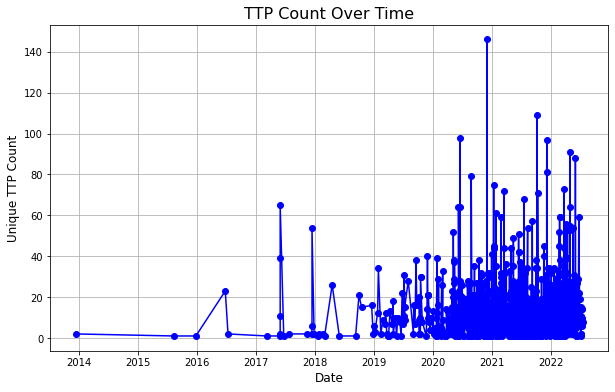

In [15]:
import numpy as np
# Convert date strings to datetime objects for sorting
data = []
for date, count in [
    (entry["date"], entry["unique_ttp_count"])
    for entry in results.values()
]:
    try:
        # Try to parse full date
        parsed_date = datetime.strptime(date, "%Y-%m-%d")
    except ValueError:
        try:
            # If only the year is provided, assume January 1st
            parsed_date = datetime.strptime(date, "%Y")
        except ValueError:
            # Skip if the date format is entirely invalid
           # print(f"Skipping invalid date format: {date}")
            continue
    data.append((parsed_date, count))

# Sort the data by parsed dates
data.sort()

# Step 2: Prepare data for plotting
dates = [entry[0] for entry in data]
ttp_counts = [entry[1] for entry in data]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, ttp_counts, marker="o", linestyle="-", color="b")

# Step 4: Add labels and title
plt.title("TTP Count Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unique TTP Count", fontsize=12)
plt.grid(True)

# Step 5: Display the chart
# Save the plot as a PDF
#output_pdf = "Malpediacount_plot_longitudnal.pdf"
#output_pdf = "MITREcount_plot.pdf"
#plt.savefig(output_pdf, format='pdf')

plt.show()


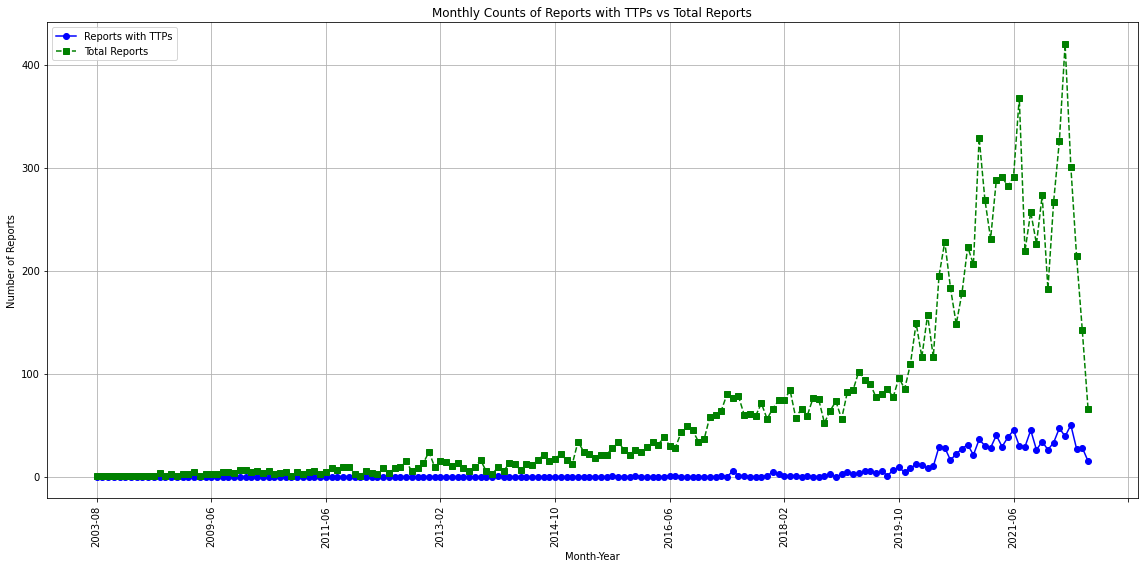

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Combine keys to ensure both datasets align
all_months = sorted(set(ttp_monthly_count.keys()) | set(reports_per_month.keys()))

# Prepare data for plotting
ttp_counts = [ttp_monthly_count.get(month, 0) for month in all_months]
report_counts = [reports_per_month.get(month, 0) for month in all_months]

# Plot the data
plt.figure(figsize=(16, 8))  # Set figure size
plt.plot(all_months, ttp_counts, marker='o', linestyle='-', color='b', label="Reports with TTPs")
plt.plot(all_months, report_counts, marker='s', linestyle='--', color='g', label="Total Reports")

# Customize the x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))  # Show at most 12 ticks
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.xlabel('Month-Year')
plt.ylabel('Number of Reports')
plt.title('Monthly Counts of Reports with TTPs vs Total Reports')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
import os
import re
import json
from urllib.parse import urlparse
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

def collect_ttp_counts_with_metadata(folder_path, metadata_file_path):
    # Regex pattern to capture TTPs (e.g., T1003, T1018, T1037)
    ttp_pattern = re.compile(r'\bT\d{4}(?:\.\d+)?\b')

    # Dictionary to store the results
    combined_data = {}

    # Dictionary to count files with TTPs per month
    ttp_monthly_count = defaultdict(int)

    # Load all metadata from the JSONL file into a dictionary
    metadata = {}
    with open(metadata_file_path, 'r') as meta_file:
        for line in meta_file:
            entry = json.loads(line)
            download_sha256 = entry.get("download_sha256")
            if download_sha256:
                metadata[download_sha256] = {
                    "fqdn": urlparse(entry.get("url", "")).netloc,
                    "date": entry.get("date", "")
                }
                
                
    # Initialize a defaultdict to store the count of reports per month
    reports_per_month = defaultdict(int)

    # Iterate through the metadata dictionary
    for key, value in metadata.items():
        date = value.get('date', '')
        if date:
            try:
                # Handle different date formats
                if len(date) == 4:  # Year only (e.g., "2000")
                    # Skip year-only entries
                    continue
                elif len(date) == 7:  # Year and month (e.g., "2003-08")
                    date_obj = datetime.strptime(date, '%Y-%m')
                elif len(date) == 10:  # Full date (e.g., "2004-01-30")
                    date_obj = datetime.strptime(date, '%Y-%m-%d')
                else:
                    raise ValueError("Unrecognized date format")

                # Extract the month-year as a string (e.g., "2003-08")
                month_year = date_obj.strftime('%Y-%m')

                # Increment the count for the extracted month-year
                reports_per_month[month_year] += 1
            except ValueError:
                print(f"Skipping invalid date format: {date}")
                
    # Loop through files in the specified folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Skip if not a file
        if not os.path.isfile(file_path):
            continue

        # Extract the hash from the filename (up to the first '.')
        download_sha256 = filename.split(".")[0]

        # Set to store unique TTPs in the current file
        unique_ttps = set()

        # Read the file and extract TTPs
        with open(file_path, 'r') as file:
            for line in file:
                # Find all TTPs in the line and add them to the set
                matches = ttp_pattern.findall(line)
                unique_ttps.update(matches)

        # Count the number of unique TTPs
        ttp_count = len(unique_ttps)

        # Get metadata for the current file's hash
        file_metadata = metadata.get(download_sha256, {})
        fqdn = file_metadata.get("fqdn")
        date = file_metadata.get("date")
        unique_ttp_count = file_metadata.get("unique_ttp_count")

        # Handle different date formats
        if date:
            try:
                if len(date) == 4:  # Year only (e.g., "2019")
                    # Skip entries with only a year to avoid artificial spikes
                    #print(f"Skipping year-only date: {date}")
                    continue
                elif len(date) == 7:  # Year and month (e.g., "2019-05")
                    date_obj = datetime.strptime(date, '%Y-%m')
                elif len(date) == 10:  # Full date (e.g., "2019-05-15")
                    date_obj = datetime.strptime(date, '%Y-%m-%d')
                else:
                    raise ValueError("Unrecognized date format")

                # Extract month-year
                month_year = date_obj.strftime('%Y-%m')
                ttp_monthly_count[month_year] += 1
            except ValueError:
                print(f"Skipping invalid date format in metadata: {date}")
        else:
            print(f"No date provided for file: {filename}")

        
        #metadata[download_sha256].update({"unique_ttp_count": ttp_count})
        #print(metadata[download_sha256],download_sha256 )
        
    
        # Add the data to the dictionary
        combined_data[filename] = {
            "unique_ttp_count": ttp_count,
            "date": date,
            "fqdn": fqdn,
            "download_sha256": download_sha256,
        }     

    return metadata, combined_data, ttp_monthly_count, reports_per_month




# Specify the folder path containing the files and the metadata file path
folder_path = 'malpedia_20220718/iocs'
metadata_file_path = r"/Users/aakankshahome/Library/Mobile Documents/com~apple~CloudDocs/malpedia_20220718/malpedia-db_2022-07-18_downloader.jsonl"

# Collect the data
results, results_reportwttp, ttp_monthly_count, reports_per_month = collect_ttp_counts_with_metadata(folder_path, metadata_file_path)

# Print the count of the results
print(f"Total files processed: {len(results)}")

    
print(f"Total files with TTP processed: {len(results_reportwttp)}")


print("Monthly counts of reports with TTPs:", ttp_monthly_count)
print("Monthly counts of reports:", reports_per_month)
#for month, count in sorted(ttp_monthly_count.items()):
#    print(f"{month}: {count}")

# Plot the results
#plot_ttp_trend(ttp_monthly_count)


Total files processed: 11364
Total files with TTP processed: 974
Monthly counts of reports with TTPs: defaultdict(<class 'int'>, {'2020-10': 31, '2021-07': 30, '2021-02': 28, '2021-03': 40, '2019-05': 5, '2021-01': 30, '2021-11': 34, '2021-06': 45, '2019-04': 5, '2022-01': 33, '2021-04': 29, '2022-06': 28, '2022-04': 50, '2022-03': 39, '2020-06': 28, '2022-07': 15, '2021-05': 38, '2020-07': 16, '2019-10': 9, '2022-05': 27, '2017-12': 4, '2020-12': 36, '2020-01': 12, '2022-02': 47, '2021-10': 26, '2021-08': 29, '2021-09': 45, '2017-03': 1, '2020-05': 29, '2020-09': 27, '2020-08': 22, '2020-03': 8, '2018-12': 2, '2020-04': 10, '2018-10': 2, '2019-06': 3, '2020-11': 21, '2020-02': 11, '2018-01': 2, '2019-11': 4, '2021-12': 26, '2019-07': 5, '2019-08': 1, '2019-09': 6, '2016-07': 1, '2013-12': 1, '2016-06': 1, '2015-12': 1, '2018-02': 1, '2019-01': 4, '2017-05': 5, '2015-08': 1, '2019-12': 8, '2019-02': 2, '2018-04': 1, '2018-03': 1, '2018-09': 1, '2019-03': 3, '2018-06': 1, '2017-07': 1, 

In [13]:
def plot_ttp_trends(ttp_monthly_count, ttp_data):
    from matplotlib.ticker import MaxNLocator

    # Sort the data by month-year
    sorted_months = sorted(ttp_monthly_count.keys())
    monthly_counts = [ttp_monthly_count[month] for month in sorted_months]

    # Compute total TTPs per month
    total_ttps_per_month = []
    for month in sorted_months:
        total_ttp = sum(
            data["unique_ttp_count"] 
            for data in ttp_data.values() 
            if data["date"] and data["date"].startswith(month)
        )
        total_ttps_per_month.append(total_ttp)

    # Plot the data
    plt.figure(figsize=(16, 8))

    # Plot line for number of files with TTPs
    plt.plot(sorted_months, monthly_counts, marker='o', linestyle='-', color='b', label="Reports with TTPs")

    # Plot line for total TTPs per month
    plt.plot(sorted_months, total_ttps_per_month, marker='x', linestyle='--', color='r', label="Total TTPs")

    # Customize the x-axis
    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))  # Limit to 12 ticks
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.title('Monthly Trends: Reports with TTPs and Total TTPs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_ttp_trend(ttp_monthly_count):
    from matplotlib.ticker import MaxNLocator

    # Sort the data by month-year
    sorted_months = sorted(ttp_monthly_count.keys())
    counts = [ttp_monthly_count[month] for month in sorted_months]

    # Plot the data
    plt.figure(figsize=(16, 8))  # Increased width for better visibility
    plt.plot(sorted_months, counts, marker='o', linestyle='-', color='b', label="TTP Count")

    # Customize the x-axis
    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))  # Show at most 12 ticks (adjust as needed)
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and adjust font size
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Files with TTPs')
    plt.title('Monthly Count of Reports with TTPs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

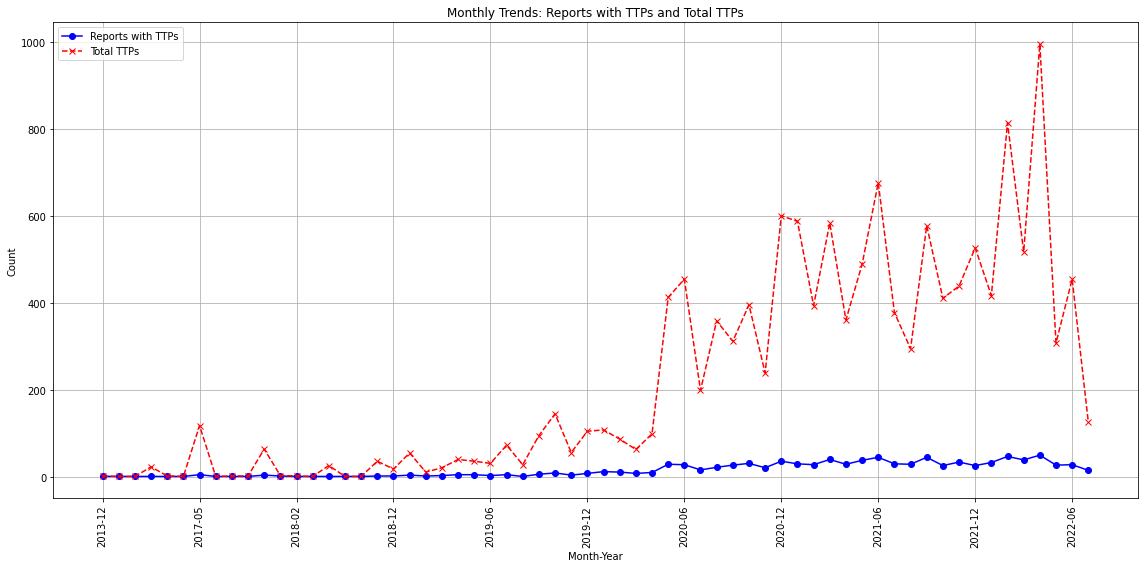

In [14]:
# Plot both trends
plot_ttp_trends(ttp_monthly_count, results)